In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
import os
import collections
import itertools

In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as spio
import tensorflow as tf

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [5]:
from six.moves import urllib

In [6]:
train_mat = spio.loadmat('train_32x32.mat', squeeze_me=True)

In [7]:
test_mat = spio.loadmat('test_32x32.mat', squeeze_me=True)

In [8]:
train_mat.keys()

dict_keys(['__version__', 'y', 'X', '__globals__', '__header__'])

In [9]:
# vamos extrair só as variáveis que nos interessam

x_train = train_mat['X']
y_train = train_mat['y']

x_test = test_mat['X']
y_test = test_mat['y']

In [10]:
x_train.shape

(32, 32, 3, 73257)

In [11]:
x_train[0]

array([[[ 33,  84,  19, ...,  92, 190, 216],
        [ 30,  76,  54, ...,  78, 188, 217],
        [ 38,  59, 110, ..., 101, 191, 212]],

       [[ 15,  86,  20, ...,  94, 205, 221],
        [ 23,  73,  52, ...,  82, 203, 222],
        [ 19,  66, 111, ..., 105, 206, 217]],

       [[ 15,  77,  25, ..., 114, 220, 226],
        [ 17,  78,  57, ..., 101, 218, 227],
        [ 19,  56, 116, ..., 125, 220, 221]],

       ...,

       [[ 72,  90,  65, ..., 200, 229, 200],
        [ 65,  78, 144, ..., 201, 231, 199],
        [ 56,  69, 223, ..., 203, 224, 191]],

       [[ 82,  88,  78, ..., 192, 229, 193],
        [ 77,  77, 148, ..., 193, 229, 188],
        [ 57,  67, 218, ..., 195, 224, 182]],

       [[ 89,  88,  98, ..., 190, 229, 197],
        [ 79,  78, 158, ..., 191, 228, 189],
        [ 59,  66, 220, ..., 193, 223, 186]]], dtype=uint8)

In [12]:
y_train.shape, y_test.shape

((73257,), (26032,))

In [13]:
x_train = np.transpose(x_train, (3, 0, 1, 2))
x_test = np.transpose(x_test, (3, 0, 1, 2))

In [14]:
x_train[0]

array([[[ 33,  30,  38],
        [ 15,  23,  19],
        [ 15,  17,  19],
        ...,
        [ 72,  65,  56],
        [ 82,  77,  57],
        [ 89,  79,  59]],

       [[ 28,  39,  35],
        [ 14,  25,  22],
        [ 14,  20,  17],
        ...,
        [ 40,  39,  50],
        [ 67,  58,  52],
        [ 83,  78,  60]],

       [[ 40,  41,  38],
        [ 18,  21,  26],
        [ 16,  17,  23],
        ...,
        [ 23,  29,  45],
        [ 35,  42,  44],
        [ 72,  69,  53]],

       ...,

       [[ 86,  81,  75],
        [ 87,  82,  71],
        [ 82,  79,  65],
        ...,
        [104, 104,  87],
        [104, 105,  81],
        [103, 105,  78]],

       [[ 84,  86,  64],
        [ 86,  79,  72],
        [ 82,  76,  72],
        ...,
        [110, 103,  84],
        [106, 105,  85],
        [106, 104,  86]],

       [[ 85,  88,  68],
        [ 89,  82,  72],
        [ 85,  79,  67],
        ...,
        [111, 104,  87],
        [109, 105,  86],
        [103, 106,  79]]

In [48]:
x_train = x_train[:15000]
x_test = x_test[:15000]

In [49]:
y_train = y_train[:15000]
y_test = y_test[:15000]

In [50]:
x_train.shape

(10000, 32, 32, 3)

In [51]:
x_train[0].shape

(32, 32, 3)

In [52]:
def display_digit(digit):
    plt.imshow(digit, interpolation='nearest')

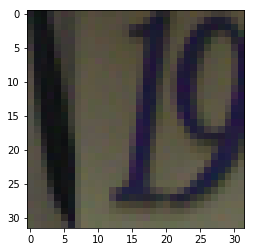

In [53]:
display_digit(x_train[0])

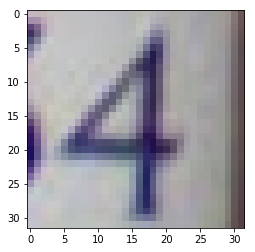

In [54]:
display_digit(x_test[19])

In [81]:
height = 32
width = 32
channels = 3

n_inputs = height * width

In [56]:
conv1_featrure_maps = 32
conv1_kernel_size = 3
conv1_stride = 1
conv1_pad = 'SAME'

In [57]:
conv2_featrure_maps = 62
conv2_kernel_size = 3
conv2_stride = 2
conv2_pad = 'SAME'

In [58]:
pool3_feature_maps = conv2_featrure_maps

In [59]:
n_fullyconn1 = 64
n_outputs = 11

In [60]:
tf.reset_default_graph()

In [61]:
X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name='X')

In [62]:
y = tf.placeholder(tf.int32, shape=[None], name='y')

In [63]:
conv1 = tf.layers.conv2d(X, filters=conv1_featrure_maps,
                        kernel_size=conv1_kernel_size,
                        strides=conv1_stride, padding=conv1_pad,
                        activation=tf.nn.relu, name='conv1')

In [64]:
conv1.shape

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(32)])

In [65]:
conv2 = tf.layers.conv2d(conv1, filters=conv2_featrure_maps,
                        kernel_size=conv2_kernel_size,
                        strides=conv2_stride, padding=conv2_pad,
                        activation=tf.nn.relu, name='conv2')

In [66]:
conv2.shape

TensorShape([Dimension(None), Dimension(16), Dimension(16), Dimension(62)])

In [67]:
pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], #[quantidade, altura, largura, canais]
                      strides = [1, 2, 2, 1], #[quantidade, altura, largura, canais]
                      padding='VALID')

In [68]:
pool3.shape

TensorShape([Dimension(None), Dimension(8), Dimension(8), Dimension(62)])

In [69]:
pool3_flat = tf.reshape(pool3, shape=[-1, pool3_feature_maps * 8 * 8])

In [70]:
fullyconn1 = tf.layers.dense(pool3_flat, n_fullyconn1,
                            activation=tf.nn.relu, name='fc1')

In [71]:
logits = tf.layers.dense(fullyconn1, n_outputs, name='output')

In [72]:
# agora iremos definir nossa função de entropia
# para medir o quão bom nosso modelo está sendo 
# eficiente na classificação

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)

In [73]:
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

In [74]:
correct = tf.nn.in_top_k(logits, y, 1)

In [75]:
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [76]:
init = tf.global_variables_initializer()

In [77]:
current_interation = 0

def get_next_batch(batch_size):
    global current_interation
    
    start_index = (current_interation * batch_size) % len(y_train)
    end_index = start_index + batch_size
    
    x_batch = x_train[start_index:end_index]
    y_batch = y_train[start_index:end_index]
    
    current_interation = current_interation + 1
    
    return x_batch, y_batch

In [78]:
n_epochs = 10
batch_size = 100

In [80]:
with tf.Session() as sess:
    init.run()
    
    num_exemples = len(y_train)
    for epoch in range(n_epochs):
        for iteration in range(num_exemples//batch_size):
            X_batch, y_batch = get_next_batch(batch_size)
            
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X:X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: x_test, y: y_test})
        
        print(epoch, "Train accuracy:", acc_train, "Test ")

0 Train accuracy: 0.26 Test 
1 Train accuracy: 0.56 Test 
2 Train accuracy: 0.64 Test 
3 Train accuracy: 0.66 Test 
4 Train accuracy: 0.74 Test 
5 Train accuracy: 0.77 Test 
6 Train accuracy: 0.8 Test 
7 Train accuracy: 0.78 Test 
8 Train accuracy: 0.82 Test 
9 Train accuracy: 0.79 Test 
